<a href="https://colab.research.google.com/github/NevermindGust/IA_Python_Aulas/blob/main/aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [5]:
housing = pd.read_csv('USA_Housing.csv')
#mostra a estrutura da tabela
housing.shape

(5000, 7)

In [9]:
housing.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
housing.describe()

In [8]:
#dicionario com o nome das colunas
housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

'Avg. Area Income' - media do salario na area  
'Avg. Area House Age' - media da idade das casas nas areas  
'Avg. Area Number of Rooms' - media do numero de comodos  
'Avg. Area Number of Bedrooms' - media do numero de quartos  
'Area Population' - populacao da area  
'Price' - preco de venda das casas  
'Address' - endereco  

In [10]:
#excluindo uma coluna desnecessaria
housing.drop('Address', axis=1, inplace=True)

In [12]:
#normalizando o dataframe
normalized_housing=(housing-housing.min()/housing-housing.max())

In [ ]:
#adicionando as variaveis
x = housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y = housing['Price']
x.head()
y.head()

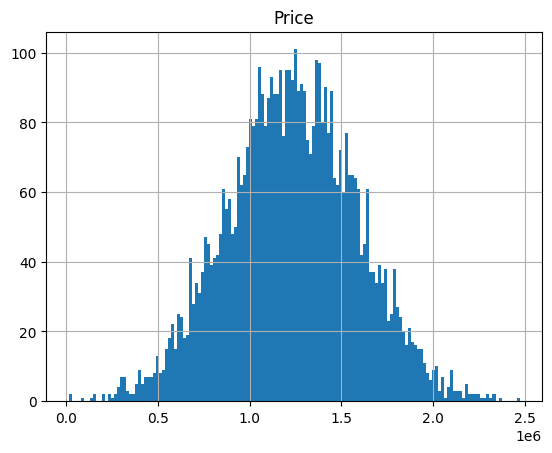

In [30]:
housing.hist(column='Price',bins = 150)
plt.show()

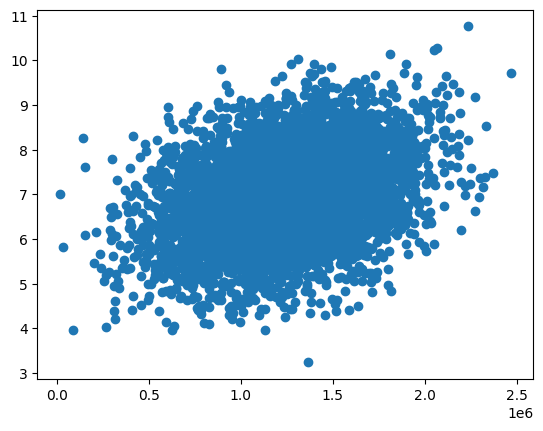

In [42]:
j = housing['Avg. Area Number of Rooms']
i = housing['Price']
plt.scatter(i, j)
plt.show()

In [ ]:
j = housing['Price']
i = housing['Avg. Area Number of Bedrooms']
plt.scatter(i, j)
plt.show()

In [39]:
#inicio do scikit_learn - machine learning
#train test split encontra o good fit do modelo
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

In [55]:
#importar modelo de regressao linear
from sklearn.linear_model import LinearRegression

In [47]:
#criando modelo
modelopreditor = LinearRegression()

In [46]:
#aprendizado do modelo
modelopreditor.fit(x_train, y_train)

LinearRegression()

In [58]:
#imprimindo coeficientes com nomes das  - ERRO
coeff = pd.DataFrame(modelopreditor.coef_, x.columns, columns=['Coeficiente'])

coeff

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [ ]:
#fazendo predicoes com dados dos testes
prediction = modelopreditor.predict(x_test)

In [ ]:
#imprime as primeiras variaveis preditoras
x_test.head()

In [ ]:
prediction

In [ ]:
y_test.head()

In [ ]:
from sklearn import metrics

print ('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))